In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('seaborn')

/tmp/ipykernel_18524/2442770903.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
noisy_data = 'yes' # 'yes' or 'no'
signal_to_noise_limit = 5


In [12]:
log_runs_dir = '/home/beck/star-formation-ML/logs/eval/runs/'

# Listet den Inhalt des Predictions-Verzeichnisses auf
log_runs = os.listdir(log_runs_dir)

# Sortiert die Versionen nach Namen
sorted_runs = sorted(log_runs)

# Die neueste Version ist die letzte in der sortierten Liste
aktuelle_version = sorted_runs[-1]
letzte_version = sorted_runs[-2]

In [13]:
version = letzte_version 

In [37]:
# load data

if noisy_data == 'yes':
    
    x_test_original = np.load('%s%s/spectra.npy' %(log_runs_dir, version))
    x_test = np.load('%s%s/x_test.npy' %(log_runs_dir, version))
    x_pred = np.load('%s%s/x_pred.npy' %(log_runs_dir, version))
    y_test = np.load('%s%s/y_test.npy' %(log_runs_dir, version))
    y_pred = np.load('%s%s/y_pred.npy' %(log_runs_dir, version))

    y_test_scaled  = np.load('%s%s/y_test_scaled.npy' %(log_runs_dir, version))
    y_pred_scaled  = np.load('%s%s/y_pred_scaled.npy' %(log_runs_dir, version))
    
    NOISE  = np.load('%s%s/NOISE.npy' %(log_runs_dir, version))
    
    signal_to_noise = np.max(x_test_original, axis=1)/np.abs(np.random.normal(0, scale=NOISE))
    low_signal_to_noise = np.where(signal_to_noise <= signal_to_noise_limit)
    high_signal_to_noise = np.where(signal_to_noise > signal_to_noise_limit)
    
else: 

    x_test = np.load('%s%s/x_test_no_noise.npy' %(log_runs_dir, version))
    x_pred = np.load('%s%s/x_pred_no_noise.npy' %(log_runs_dir, version))
    y_test = np.load('%s%s/y_test_no_noise.npy' %(log_runs_dir, version))
    y_pred = np.load('%s%s/y_pred_no_noise.npy' %(log_runs_dir, version))

    y_test_scaled  = np.load('%s%s/y_test_scaled_no_noise.npy' %(log_runs_dir, version))
    y_pred_scaled  = np.load('%s%s/y_pred_scaled_no_noise.npy' %(log_runs_dir, version))

In [38]:
np.shape(signal_to_noise)

(16807,)

In [15]:
x_test_original = x_test_original[int(0.8*len(x_test_original)):]


## Extracting Parameters from the Predicted and Ground Truth Values

In [16]:
T_true_scaled = y_test_scaled[:, 0]
T_alpha_true_scaled = y_test_scaled[:, 1]
n_true_scaled = y_test_scaled[:, 2]
n_alpha_true_scaled = y_test_scaled[:, 3]
M_true_scaled = y_test_scaled[:, 4]

T_predicted_scaled = y_pred_scaled[:, 0]
T_alpha_predicted_scaled = y_pred_scaled[:, 1]
n_predicted_scaled = y_pred_scaled[:, 2]
n_alpha_predicted_scaled = y_pred_scaled[:, 3]
M_predicted_scaled = y_pred_scaled[:, 4]

T_true = y_test[:, 0]
T_alpha_true = y_test[:, 1]
n_true = y_test[:, 2]
n_alpha_true = y_test[:, 3]
M_true = y_test[:, 4]

T_predicted = y_pred[:, 0]
T_alpha_predicted = y_pred[:, 1]
n_predicted = y_pred[:, 2]
n_alpha_predicted = y_pred[:, 3]
M_predicted = y_pred[:, 4]

unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_T_alpha, unique_indices = np.unique(T_alpha_true, return_index=True)
unique_values_n, unique_indices = np.unique(n_true, return_index=True)
unique_values_n_alpha, unique_indices = np.unique(n_alpha_true, return_index=True)
unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_M, unique_indices = np.unique(M_true, return_index=True)

## Histogram of the Difference between Predicted and Ground Truth Spectra and parameters

In [17]:
# Größte Intensitätsunterschiede
error_spectra = np.mean(np.abs(x_test - x_pred), axis=1)

error_parameter = np.mean(np.abs(y_test_scaled - y_pred_scaled), axis=1)
error_T = np.abs(y_test_scaled[:,0] - y_pred_scaled[:,0])
error_T_alpha = np.abs(y_test_scaled[:,1] - y_pred_scaled[:,1])
error_n = np.abs(y_test_scaled[:,2] - y_pred_scaled[:,2])
error_n_alpha = np.abs(y_test_scaled[:,3] - y_pred_scaled[:,3])
error_M = np.abs(y_test_scaled[:,4] - y_pred_scaled[:,4])

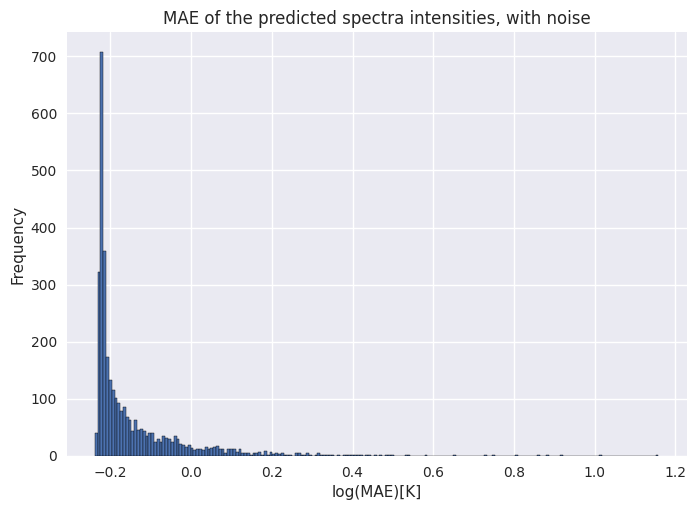

In [21]:
#fig = plt.figure(figsize=(12, 9))
plt.hist(np.log10(error_spectra), bins= 200, edgecolor='black')  # Anzahl der Bins anpassen, falls gewünscht
plt.xlabel('log(MAE)[K]')
plt.ylabel('Frequency')

if noisy_data == 'yes':
    plt.title('MAE of the predicted spectra intensities, with noise')
else:
    plt.title('MAE of the predicted spectra intensities')
    
#if noisy_data == 'yes':
    #plt.savefig('./Predictions/%s/Analysis/histogram_MAE_spectra_noise.png' %version, dpi=500)
#else: 
    #plt.savefig('./Predictions/%s/Analysis/histogram_MAE_spectra.png' %version, dpi=500)
plt.show()

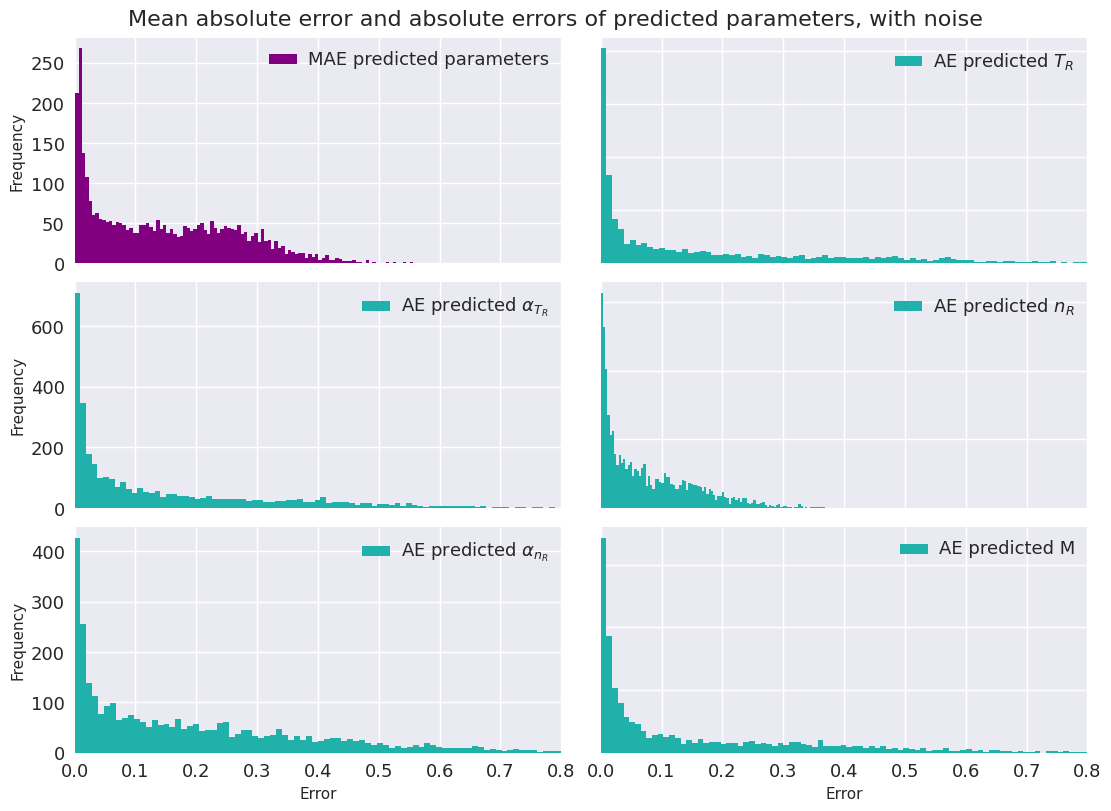

In [23]:
fig = plt.figure(layout="constrained", figsize=(11, 8))
gs = fig.add_gridspec(3, 2) #, hspace=0.5, wspace=0.2)

if noisy_data == 'yes':
    fig.suptitle('Mean absolute error and absolute errors of predicted parameters, with noise', fontsize = 16)
else:
    fig.suptitle('Mean absolute error and absolute errors of predicted parameters', fontsize = 16)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

ax1.hist(error_parameter, bins= 100, color = 'purple')  # Anzahl der Bins anpassen, falls gewünscht
ax2.hist(error_T, bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
ax3.hist(error_T_alpha, bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
ax4.hist(error_n, bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
ax5.hist(error_n_alpha, bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
ax6.hist(error_M, bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht

legend1 = ax1.legend(['MAE predicted parameters'], loc='upper right')
legend1.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text
    
legend2 = ax2.legend(['AE predicted $T_R$'], loc='upper right')
legend2.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

legend3 = ax3.legend(['AE predicted $\\alpha_{T_R}$'], loc='upper right')
legend3.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

legend4 = ax4.legend(['AE predicted $n_R$'], loc='upper right')
legend4.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

legend5 = ax5.legend(['AE predicted $\\alpha_{n_R}$'], loc='upper right')
legend5.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

legend6 = ax6.legend(['AE predicted M'], loc='upper right')
legend6.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

for ax in fig.get_axes():
    ax.set_xlabel('Error')
    ax.set_ylabel('Frequency')
    ax.label_outer()
    ax.set_xlim(0, 0.8)
    ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8
    
#if noisy_data == 'yes':
#    plt.savefig('./Predictions/%s/Analysis/All_histograms_noise.png' %version, dpi=500)
#else:
#    plt.savefig('./Predictions/%s/Analysis/All_histograms.png' %version, dpi=500)


IndexError: index 3428 is out of bounds for axis 0 with size 3361

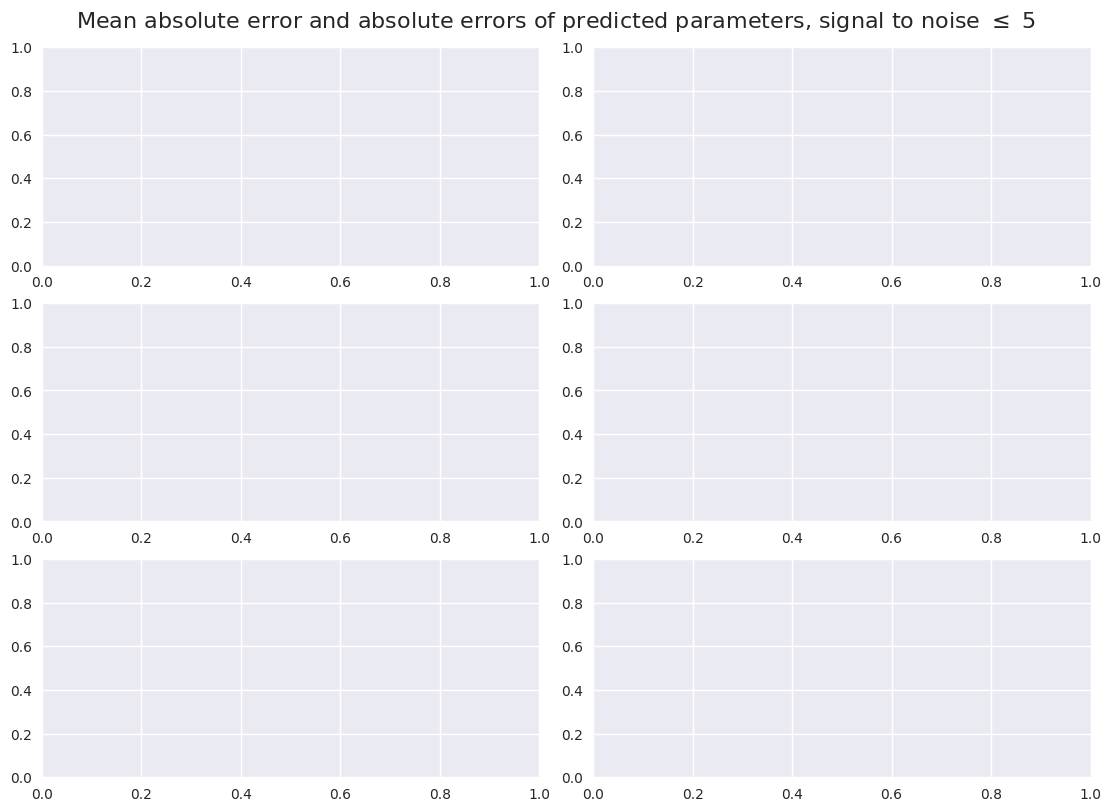

In [24]:
if noisy_data == 'yes':

    fig = plt.figure(layout="constrained", figsize=(11, 8))
    gs = fig.add_gridspec(3, 2) #, hspace=0.5, wspace=0.2)

    fig.suptitle('Mean absolute error and absolute errors of predicted parameters, signal to noise $\leq$ %s' %signal_to_noise_limit, fontsize = 16)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])

    ax1.hist(error_parameter[low_signal_to_noise], bins= 100, color = 'purple')  # Anzahl der Bins anpassen, falls gewünscht
    ax2.hist(error_T[low_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax3.hist(error_T_alpha[low_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax4.hist(error_n[low_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax5.hist(error_n_alpha[low_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax6.hist(error_M[low_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht

    legend1 = ax1.legend(['MAE predicted parameters'], loc='upper right')
    legend1.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend2 = ax2.legend(['AE predicted $T_R$'], loc='upper right')
    legend2.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend3 = ax3.legend(['AE predicted $\\alpha_{T_R}$'], loc='upper right')
    legend3.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend4 = ax4.legend(['AE predicted $n_R$'], loc='upper right')
    legend4.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend5 = ax5.legend(['AE predicted $\\alpha_{n_R}$'], loc='upper right')
    legend5.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend6 = ax6.legend(['AE predicted M'], loc='upper right')
    legend6.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    for ax in fig.get_axes():
        ax.set_xlabel('Error')
        ax.set_ylabel('Frequency')
        ax.label_outer()
        ax.set_xlim(0, 0.8)
        ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8

    plt.savefig('./Predictions/%s/Analysis/All_histograms_noise1.png' %version, dpi=500)

IndexError: index 3361 is out of bounds for axis 0 with size 3361

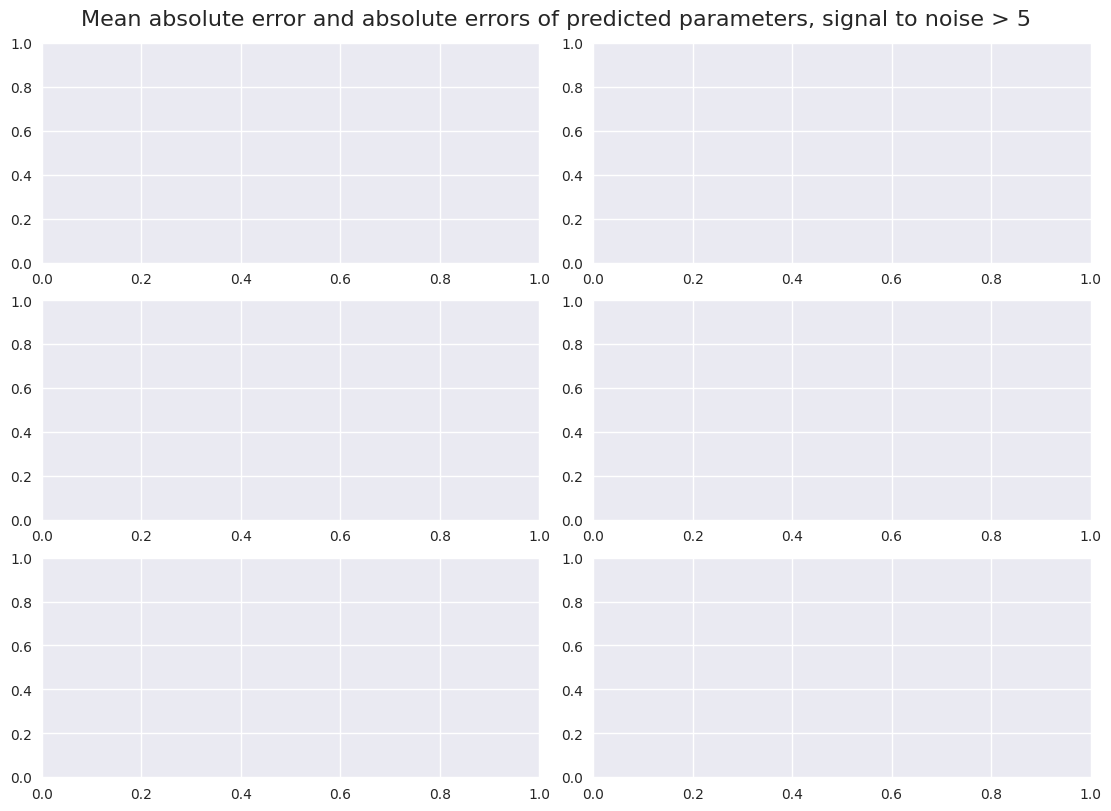

In [25]:
if noisy_data == 'yes':

    fig = plt.figure(layout="constrained", figsize=(11, 8))
    gs = fig.add_gridspec(3, 2) #, hspace=0.5, wspace=0.2)

    fig.suptitle('Mean absolute error and absolute errors of predicted parameters, signal to noise > %s' %signal_to_noise_limit, fontsize = 16)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])

    ax1.hist(error_parameter[high_signal_to_noise], bins= 100, color = 'purple')  # Anzahl der Bins anpassen, falls gewünscht
    ax2.hist(error_T[high_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax3.hist(error_T_alpha[high_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax4.hist(error_n[high_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax5.hist(error_n_alpha[high_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht
    ax6.hist(error_M[high_signal_to_noise], bins= 100, color = 'lightseagreen')  # Anzahl der Bins anpassen, falls gewünscht

    legend1 = ax1.legend(['MAE predicted parameters'], loc='upper right')
    legend1.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend2 = ax2.legend(['AE predicted $T_R$'], loc='upper right')
    legend2.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend3 = ax3.legend(['AE predicted $\\alpha_{T_R}$'], loc='upper right')
    legend3.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend4 = ax4.legend(['AE predicted $n_R$'], loc='upper right')
    legend4.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend5 = ax5.legend(['AE predicted $\\alpha_{n_R}$'], loc='upper right')
    legend5.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    legend6 = ax6.legend(['AE predicted M'], loc='upper right')
    legend6.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text

    for ax in fig.get_axes():
        ax.set_xlabel('Error')
        ax.set_ylabel('Frequency')
        ax.label_outer()
        ax.set_xlim(0, 0.8)
        ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8

    plt.savefig('./Predictions/%s/Analysis/All_histograms_noise2.png' %version, dpi=500)
